In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/owid-covid-data.csv", parse_dates=["date"])

countries = ["United States", "India", "Kenya", "Brazil", "Germany","uganda", "Tanzania", "China"]

df_sub = df[df.location.isin(countries)].copy()
df_sub.dropna(subset=["date","total_cases"], inplace=True)
df_sub["date"] = pd.to_datetime(df_sub["date"])
df_sub.sort_values(["location","date"], inplace=True)
df_sub["new_cases"]   = df_sub.groupby("location")["new_cases"].transform(lambda x: x.fillna(0))
df_sub["new_deaths"]  = df_sub.groupby("location")["new_deaths"].transform(lambda x: x.fillna(0))
df_sub["total_vaccinations"] = df_sub["total_vaccinations"].fillna(0)
df_sub["death_rate"]  = (df_sub["total_deaths"] / df_sub["total_cases"]).fillna(0)
df_sub["pct_vaccinated"] = df_sub["total_vaccinations"] / df_sub["population"] * 100



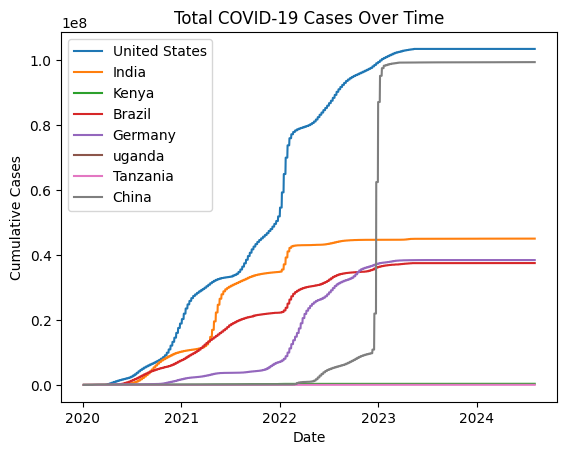

In [2]:
plt.figure()
for country in countries:
    sub = df_sub[df_sub.location == country]
    plt.plot(sub.date, sub.total_cases, label=country)

plt.legend()
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.show()


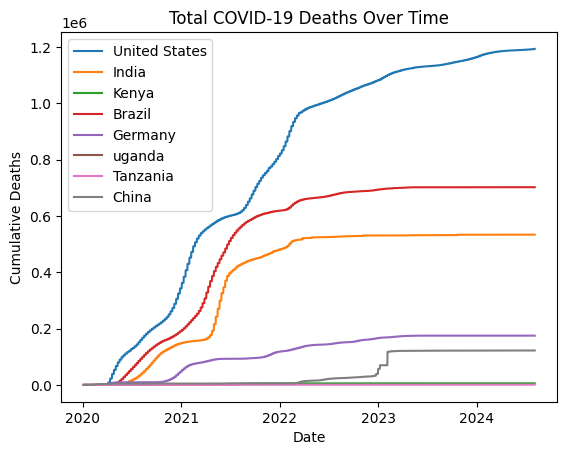

In [3]:
plt.figure()
for country in countries:
    sub = df_sub[df_sub.location == country]
    plt.plot(sub.date, sub.total_deaths, label=country)

plt.legend()
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Deaths")
plt.show()


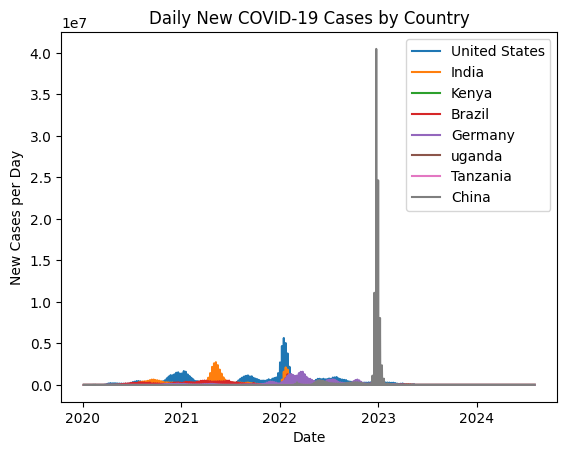

In [4]:
plt.figure()
for country in countries:
    sub = df_sub[df_sub.location == country]
    plt.plot(sub.date, sub.new_cases, label=country)

plt.legend()
plt.title("Daily New COVID-19 Cases by Country")
plt.xlabel("Date")
plt.ylabel("New Cases per Day")
plt.show()


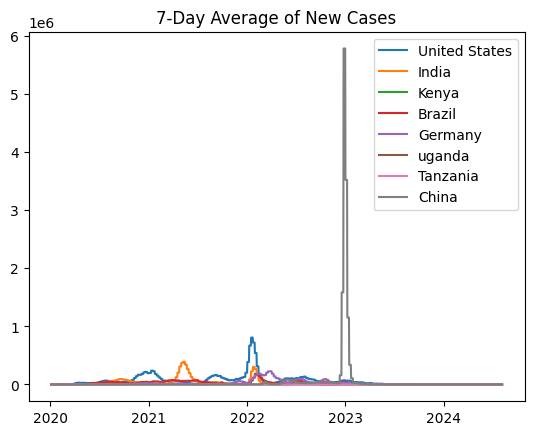

In [5]:
df_sub["new_cases_7davg"] = (
    df_sub
      .groupby("location")["new_cases"]
      .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

plt.figure()
for country in countries:
    sub = df_sub[df_sub.location == country]
    plt.plot(sub.date, sub.new_cases_7davg, label=country)
plt.legend()
plt.title("7-Day Average of New Cases")
plt.show()


In [6]:
df_latest = df_sub.groupby("location").last().reset_index()

# death rate sorted
display(
    df_latest[["location", "death_rate"]]
      .sort_values("death_rate", ascending=False)
)


,location,death_rate
5,Tanzania,0.019570
0,Brazil,0.018717
4,Kenya,0.016533
3,India,0.011847
6,United States,0.011535
2,Germany,0.004552
1,China,0.001231
